In this notebook we check the geometry and the confinment of the particles generated. 

{'ids': 'average 1T/nT', 'mass': 494, 'U238': 10.2, 'err_U238': 3.26, 'Ra226': 0.49, 'err_Ra226': 0.15, 'Co60': 0.94, 'err_Co60': 0.27, 'K40': 13.44, 'err_K40': 2.89, 'Cs137': 0.17, 'err_Cs137': 0.09, 'Th228': 0.46, 'err_Th228': 0.19, 'U235': 0.408, 'err_U235': 0.1304, 'Th232': 0.46, 'err_Th232': 0.19}


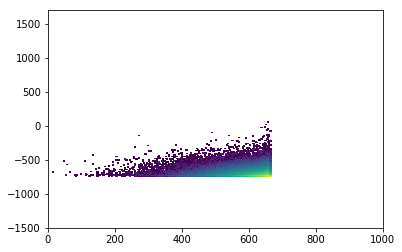

In [6]:
%run 'init.ipynb'
%run 'functions.ipynb'
#%matplotlib inline

In [7]:
#few imports 
import pandas as pd
import numpy as np
from pandas import HDFStore
from pandas import read_hdf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ROOT
import root_numpy
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
import uproot
from matplotlib.patches import Rectangle

In [3]:
offset = 1488/2


In [26]:
#oper with UpRoot --- check out the reiteration among files 
# material = "SS_OuterCryostat"
# rootfile = '/userdata/arocchetti/'+DATE +'/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'

# def get_xyz(rootfile):
#     file = uproot.open(rootfile)
#     tree = file["events/events"]
#     xp = tree["xp_pri"].array()
#     df = tree.pandas.df([ "xp_pri", "yp_pri", "zp_pri"])
#     df.columns = ['X', 'Y', 'Z_uc'] #rename 
#     #Add some variables
#     df['R'] = np.sqrt(df.X*df.X+ df.Y*df.Y)
#     df['R2'] = df.R*df.R
#     offset = 1488/2
#     df['Z'] = df.Z_uc+ offset 
#     return df


In [27]:
# material = [
#     "SS_OuterCryostat",]
# rootfile = '/sc/userdata/arocchetti/XENONnT_2019-10-28/SS_OuterCryostat/U238Pb206/output_SS_OuterCryostat_U238Pb206_1.root'
# print(rootfile)
# data = get_xyz(rootfile)
# data.head()

In [28]:
##read the root file and get the branches you need 
# rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/Teflon_Pillar_/geantinos/output_Teflon_Pillar__geantinos_1.root'

# def get_position(rootfile):
#     f = ROOT.TFile(rootfile)
#     tree = f.Get('events/events')
#     out=root_numpy.tree2array(tree)
#     X = np.array([out['xp_pri'][i] for i in range(len(out['xp_pri']))])
#     Y = np.array([out['yp_pri'][i] for i in range(len(out['yp_pri']))])
#     Z_uc = np.array([out['zp_pri'][i] for i in range(len(out['zp_pri']))]) #z not centered
#     Etot = np.array(out['etot'])
#     f.Close()
#     X,Y, Z_uc, Etot = get_position(rootfile)
#     return  X,Y, Z_uc


In [29]:
#call the function and transform it into a dataframe ---SLOW----
#X,Y, Z_uc, Etot = get_position(rootfile)
#data = pd.DataFrame({'X': X, 'Y': Y, 'Z_uc': Z_uc, 'Etot': Etot})

In [18]:


def print_volume(data):
    plt.hist2d(data.R, data.Z, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
    norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.show()

def print_volume_pri(data):
    plt.hist2d(data.rp, data.zp, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
    norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.show()

def print_xy(data):
    plt.hist2d(data.X, data.Y, bins = (300,300), range = ((-1050, 1050), (-1050, 1050)), 
    norm = LogNorm())
    plt.ylabel('x [mm]')
    plt.xlabel('y [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.show()
    
def scatter(data):
    import matplotlib.lines as mlines
    plt.scatter(data.R, data.Z, marker = '.', s=2,label=material )
    c=1
    plt.xlim(-100,1200)
    plt.ylim(-1500, 1700)
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.tight_layout()
    plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-large')
#scatter(data)

In [31]:
#  if material == 'SS_Innercryostat':
#         rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#         data = get_xyz(rootfile)
#         flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
#         print_volume(flange1_in)
#         print_volume(flange2_in)
#         print_volume(flange3_in)
#         print_volume(shell_in)
#         print_volume(elongation_in)
        
#         else: 
#         rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#         data = get_xyz(rootfile)
#         print_volume(data)
    

In [32]:
# for material in materials:
#     rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#     data = get_xyz(rootfile)
#     if material == 'SS_OuterCryostat':
#         flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
#         print_xy(flange1)
#         print_xy(flange2)
#         print_xy(flange3)
#         print_xy(shell)
#         print_xy(elongation)
#     else:    
#         print_xy(data)

In [33]:
# plt.figure(figsize=(10,10))
# for material in materials:
#     rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#     data = get_xyz(rootfile)
#     scatter(data)
    #plt.show()

In [42]:
#let's divide the cryostat
def get_xyz(rootfile):
    dataframe = []
    for df in read_root(rootfile, "events/events", chunksize=1000000,
                             columns= ["xpri", "ypri", "zpri", "epri", "ns", "X", "Y", "Z", "Ed"],
                             where="ns==1"
                            ):#, unit = "chunks"):
        #print(df.X)
        x_values=[x[0] for x in df.X]
        y_values=[y[0] for y in df.Y]
        z_values=[z[0] for z in df.Z]
        df["X"]=x_values
        df["Y"]=y_values
        df["Z"]=z_values
        dataframe.append(df)
    
    dataframe=pd.concat(dataframe)
    dataframe.columns = ['xp', 'yp', 'zp_uc', "epri", "ns", "X", "Y", "Z_uc", "Ed"] #rename 
    offset = 1488/2
    dataframe['rp'] = np.sqrt(dataframe.xp**2+ dataframe.yp**2)
    dataframe['r2p'] = dataframe.rp*dataframe.rp
    dataframe['R'] = np.sqrt(dataframe.X**2+ dataframe.Y**2)
    dataframe['R2'] = (dataframe.R*dataframe.R)
    dataframe['Z'] = dataframe.Z_uc+offset
    dataframe['zp'] = dataframe.zp_uc+ offset
    return dataframe




def fig_outercryo(): 
    material = "SS_OuterCryostat"
    data = get_xyz(rootfile)
    plt.hist2d(data.rp, data.zp, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
        norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)

    currentAxis = plt.gca()
    offset = 1488/2
    #STIFFENING RINGS OUTCYRO
    currentAxis.add_patch(Rectangle((815, 300+offset), 100, 120,alpha=1, fill=None ))
    currentAxis.add_patch(Rectangle((815, -520+offset), 100, 120,alpha=1, fill=None ))
    currentAxis.add_patch(Rectangle((815, -1000+offset), 100, 120,alpha=1, fill=None ))

    plt.plot([0,1000],[-950, -950])
    plt.plot([815, 815],[-1500, 1500])
    top_flange = 300+offset+120
    start_elong = top_flange - 400
    end_elong = start_elong - 380
    plt.plot([0,1000], [start_elong,start_elong ])
    plt.plot([0,1000], [end_elong,end_elong ])
    
    return plt


#fig_outercryo()


#let's keep it here if we change sim, but if we do inner/outercryo sep not needed 
#points = ((0,732), (800,500), (-2080,-1796), (0,732))

#plt.plot([0,742],[800+offset,500+offset])
#plt.plot([0,742],[-2080+offset,-1796+offset])
#plt.plot([742,742],[500+offset,-1796+offset])

In [31]:
#let's write a function to divide the cryo
#rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/SS_OuterCryostat'+ '/geantinos/output_'+ material+'_geantinos_1.root'
#data = get_xyz_root(rootfile)

def divide_outercryo(data):
    
    flange1 = data[(data.rp>815) & (data.zp > 300+offset)]
    flange2 = data[(data.rp>815) & (data.zp < 300+offset) & (data.zp > -520 + offset)] 
    flange3 = data[(data.rp>815) & (data.zp < -520+offset) & (data.zp > -1000 + offset)]
    shell_1 = data[(data.rp<815) & (data.zp > 764)]
    shell_2 = data[(data.rp<815) &  (data.zp < 384)]
    shell = pd.concat([shell_1, shell_2]) 
    elongation = data[(data.rp<815) & (data.zp > 384) & (data.zp < 764)]
    mass_tot = 1046.12 #kg
    geant_tot = len(data)
    mass_flange1 = (mass_tot * len(flange1)) / geant_tot
    #print("mass_flange1:", mass_flange1)
    mass_flange2 = (mass_tot * len(flange2))/ geant_tot
    #print("mass_flange2:",mass_flange2)
    mass_flange3 = (mass_tot *  len(flange3))/ geant_tot
    #print("mass_flange3:",mass_flange3)
    mass_shell = (mass_tot *len(shell))/ geant_tot
    #print("mass shell:",mass_shell)
    mass_elong = (mass_tot * len(elongation))/ geant_tot
    #print("mass elongation:",mass_elong)
    #print(mass_flange1+mass_flange2+mass_flange3)      
    return flange1, flange2, flange3, shell, elongation
    

#flange1, flange2, flange3, shell, elongation = divide_outercryo(data)


In [41]:

#print_volume_pri(elongation)

In [33]:
#let's divide the cryostat
def fig_innercryo(): 
    material = "SS_InnerCryostat"
    rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
    data = get_xyz_root(rootfile)
    plt.hist2d(data.rp, data.zp, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
        norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    currentAxis = plt.gca()
    offset = 1488/2
    #STIFFENING RINGS INNERCRYO
    currentAxis.add_patch(Rectangle((735, 125+offset), 70, 160,alpha=1, fill=None ))
    currentAxis.add_patch(Rectangle((732, -500+offset), 70, 160,alpha=1, fill=None ))
    currentAxis.add_patch(Rectangle((732, -1100+offset), 70, 160,alpha=1, fill=None ))
    return plt

#fig_innercryo()

In [ ]:

#rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/SS_InnerCryostat/geantinos/output_SS_InnerCryostat_geantinos_1.root'
#data = get_xyz(rootfile)
material = "SS_InnerCryostat"
isotope = "U238"
rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
data = get_xyz(rootfile)

def divide_innercryo(data):
    flange1_in = data[(data.rp>735) & (data.zp > 125+offset)]
    flange2_in = data[(data.rp>735) & (data.zp < 125+offset) & (data.zp > -500 + offset)] 
    flange3_in = data[(data.rp>735) & (data.zp < -500+offset) & (data.zp > -1000 + offset)]
    shell_in = data[(data.rp<735) & (data.zp > -910)]
    elongation_in = data[(data.rp<735) & (data.zp < -910)]
    mass_tot =766.77
    geant_tot = len(data)
    
    mass_flange1_in = (mass_tot * len(flange1_in)) / geant_tot
    #print("mass_flange1_in:", mass_flange1_in)
    mass_flange2_in = (mass_tot * len(flange2_in))/ geant_tot
    #print("mass_flange2_in:",mass_flange2_in)
    mass_flange3_in = (mass_tot *  len(flange3_in))/ geant_tot
    #print("mass_flange3_in:",mass_flange3_in)
    mass_shell_in = (mass_tot *len(shell_in))/ geant_tot
    #print("mass shell_in:",mass_shell_in)
    mass_elong_in = (mass_tot * len(elongation_in))/ geant_tot
    #print("mass elongation:",mass_elong_in)
    #print(mass_flange1_in + mass_flange2_in + mass_flange3_in + mass_shell_in + mass_elong_in)   
    
    
    
    return flange1_in, flange2_in, flange3_in, shell_in, elongation_in

#flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)

#print_volume_pri(elongation_in)

In [39]:
#inspect bell 
def fig_bell():
    plt.hist2d(data.rp, data.zp, bins = (300,300), range = ((600, 800), (500, 1200)), 
        norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.plot([0, 800],[719.29+5,719.29+5])

#fig_bell()

In [38]:
def divide_bellWall(data):
    bottomLip = data[data.zp < (719.29 + 50)]
    bellWall = data[data.zp > (719.29 + 50)]
    mass_bw =33354.05
    geant_bw = len(data)
    
    mass_bottomLip = (mass_bw * len( bottomLip)) / geant_bw
   
    #print("mass_bottomLip:", mass_bottomLip)
    return bottomLip, bellWall

#bottomLip, bellWall = divide_bellWall(data)


In [41]:
def get_electrodes(isotope):    
    electrodes = [
            "SS_GateRing",
            "SS_AnodeRing",
            "SS_TopMeshRing",
            "SS_CathodeRing",
            "SS_BottomMeshRing",
            ]

    for electrode in electrodes:

        if  (electrode == "SS_GateRing"):
            rootfile = '/userdata/arocchetti/' + DATE + '/'+ electrode + '/geantinos/output_'+ electrode+'_geantinos_1.root'
            data = get_xyz(rootfile)

        if  (electrode =="SS_AnodeRing") :
            rootfile = '/userdata/arocchetti/' + DATE + '/'+ electrode + '/geantinos/output_'+ electrode+'_geantinos_1.root'
            data_anode = get_xyz(rootfile)
            data = pd.concat([data, data_anode])

        if (electrode == "SS_TopMeshRing"):
            rootfile = '/userdata/arocchetti/' + DATE + '/'+ electrode + '/geantinos/output_'+ electrode+'_geantinos_1.root'
            data_topmesh = get_xyz(rootfile)
            data = pd.concat([data, data_topmesh]) 

        if (electrode == "SS_CathodeRing"):
            rootfile = '/userdata/arocchetti/' + DATE + '/'+ electrode + '/geantinos/output_'+ electrode+'_geantinos_1.root'
            data_cathode = get_xyz(rootfile)
            data = pd.concat([data, data_cathode])   

        if (electrode == "SS_BottomMeshRing"):
            rootfile = '/userdata/arocchetti/' + DATE + '/'+ electrode + '/geantinos/output_'+ electrode+'_geantinos_1.root'
            data_bottommesh = get_xyz(rootfile)
            data = pd.concat([data, data_bottommesh]) 
            return data


In [42]:
def get_TopPFTE(isotope):
    parts = [
        "GXeTeflon_TopElectrodesFrame",
        "Teflon_TopElectrodesFrame"]
    for part in parts:
        if (part == "GXeTeflon_TopElectrodesFrame"):
            rootfile = '/userdata/arocchetti/' + DATE +'/'+ part + '/geantinos/output_'+ part +'_geantinos_1.root'
            data = get_xyz(rootfile)   
        if (part == "Teflon_TopElectrodesFrame"):
            rootfile = '/userdata/arocchetti/' + DATE +'/'+ part + '/geantinos/output_'+ part+'_geantinos_1.root'
            data2 = get_xyz(rootfile)
            data = pd.concat([data, data2]) 
            material = "Top PTFE Frame"
            return data
        



In [43]:
def print_components():
    for material in materials:

        if material == "Top_PTFE_Frame":
            data = get_TopPFTE()
            material = "Top_PTFE_Frame"
            print_volume(data)

        elif material == "Electrodes":
            data = get_electrodes()
            material = "Electrodes Frame"
            print_xy(data)

        elif material == 'SS_OuterCryostat':
            rootfile = '/userdata/arocchetti/'+DATE +'/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
            data = get_xyz(rootfile)
            flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
            print_volume(flange1)
            print_volume(flange2)
            print_volume(flange3)
            print_volume(shell)
            print_volume(elongation)

        elif material == 'SS_InnerCryostat':
            rootfile = '/userdata/arocchetti/'+DATE +'/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
            data = get_xyz(rootfile)
            flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
            print_volume(flange1_in)
            print_volume(flange2_in)
            print_volume(flange3_in)
            print_volume(shell_in)
            print_volume(elongation_in)

        elif material == 'SS_BellSideWall':
            rootfile = '/userdata/arocchetti/'+DATE +'/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
            data = get_xyz(rootfile)
            bottomLip, bellWall = divide_bellWall(data)
            print_volume(bottomLip)
            print_volume(bellWall)

        else: 
            rootfile = '/userdata/arocchetti/'+DATE +'/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
            data = get_xyz(rootfile)
            print_volume(data)